In [18]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot
import requests
import json

from bs4 import BeautifulSoup


In [20]:
file = open("data.json", "r")

cards = json.load(file)

deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]

deck = []
for elem in deck_vector:
    deck.append(cards[elem])
len(deck)
    

30

In [2]:
file1 = open('cards-standard.txt', 'r') 
Lines = file1.readlines() 
maximum = len(Lines)
cards_key = {}
cards_value = {}
i=1
for line in Lines:
    cards_value[i] = line.rstrip("\n")
    cards_key[line.rstrip("\n")] = i
    i += 1

print(cards_key["Arcane Breath"])
print(cards_value[32])
print(len(Lines))

32
Arcane Breath
1254


In [3]:
deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
print(len(deck_vector))

#no need to filter based of card class or legendaries etc.. because this is just for the conversion after the deck has been built. The actual filtering should be either done by the AI or previously done in the deckbuilding CSV

def deck_to_vector(deck):
    deck_vector = []
    for elem in deck:
        #remove any potential white spaces from strings
        #if type(deck) is not list:
        elem = elem.lstrip()
        elem = elem.rstrip()
        deck_vector.append(cards_key[elem])
    return deck_vector

def vector_to_deck(deck_vector):
    deck = []
    for elem in deck_vector:
        deck.append(cards_value[elem])
    return deck

deck = vector_to_deck(deck_vector)
print(deck)

new_deck_vector = deck_to_vector(deck)
print(new_deck_vector)


30
['Arcane Breath', 'Demon Companion', 'Humility', 'Wrathspike Brute', 'Survival of the Fittest', 'Ancestral Healing', 'Backstab', 'Circle of Healing', 'Desk Imp', 'Double Jump', 'Hot Air Balloon', 'Lightning Bloom', 'Desperate Measures', 'Humility', 'Arcane Missiles', 'Arcane Missiles', 'Blessing of Might', 'Claw', 'Elemental Allies', 'Activate the Obelisk', 'Demonic Studies', 'Blessing of Might', 'Embalming Ritual', 'Arcane Breath', 'Embalming Ritual', 'Holy Smite', 'Lightning Bloom', 'Innervate', 'Arcane Breath', 'Embiggen']
[32, 64, 98, 1000, 1250, 1, 2, 4, 5, 70, 97, 12, 67, 98, 33, 33, 43, 54, 76, 27, 65, 43, 78, 32, 78, 96, 12, 10, 32, 6]


In [4]:
import numpy as np
import pandas as pd
def concatenate_deck_class(decks, classes):
    concatenated_result = []
    for i in range(len(decks)):
        concatenated_result.append([decks[i],classes[i]])
    return concatenated_result
def read_vector_decks(file):
    df = pd.read_csv(file)
    cards_from_csv = df['cards']
    converted_decks = []
    for cards in cards_from_csv:
        if len(deck) == 30: #len(cards)
            deck_to_convert = []
            cards = cards.strip("[]")
            cards = cards.split(", ")
            for card in cards:
                if card == '':
                    continue
                deck_to_convert.append(int(card))
            converted_decks.append(vector_to_deck(deck_to_convert)) #np.asarray
            class_from_csv = df['class']
            final = concatenate_deck_class(converted_decks, class_from_csv)
    return final
deck_list = read_vector_decks("collected_decks_vectored_Warrior.csv")


In [5]:
classes = ['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter']

class_dictionary = {}

def filter_class(class_):
    filtered_decks = []
    for deck in deck_list:
        if len(deck[0]) == 30:
            if deck[1] == class_:
                filtered_decks.append(deck)
    return filtered_decks

for class_ in classes:
    class_dictionary[class_] = filter_class(class_)
    #print(filtered_decks)        

Warrior: 1566
Mage: 0
Hunter: 0
Priest: 0
Druid: 0
Rogue: 0
Shaman: 0
Warlock: 0
Paladin: 0
Demon Hunter: 0


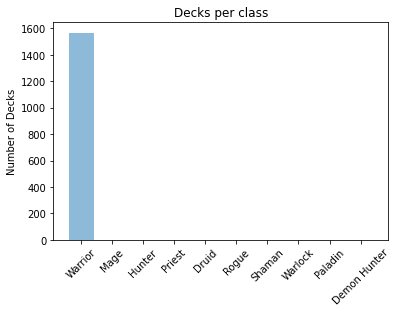

In [6]:
import numpy as np
import matplotlib.pyplot as plt

performance = []
#number of decks of each class
for class_ in classes:
    performance.append(len(class_dictionary[class_]))
    print(class_ + ": " + str(len(class_dictionary[class_])))


y_pos = np.arange(len(classes))
plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, classes, rotation = 45)
plt.ylabel('Number of Decks')
plt.title('Decks per class')
plt.show()

In [7]:
import random

def generate_fake_deck():
    deck = []
    for i in range(30):
        x = random.randint(1,maximum)
        deck.append(x)
    return deck

deck = generate_fake_deck()
deck = vector_to_deck(deck)
deck

['Activate the Obelisk',
 'EVIL Totem',
 'Cairne Bloodhoof',
 'Edwin VanCleef',
 'Argent Protector',
 'Lightwell',
 'SI:7 Infiltrator',
 'Scarlet Crusader',
 'Grand Lackey Erkh',
 'Guardian Augmerchant',
 'Mana Cyclone',
 'Commencement',
 'Stampeding Kodo',
 'Dirty Tricks',
 'Twilight Runner',
 'Chef Nomi',
 'Far Sight',
 'Risky Skipper',
 'Keeper of the Grove',
 'Guardian of Kings',
 'Shadow Word: Ruin',
 'Ancestral Healing',
 'Wild Growth',
 'Madame Lazul',
 'Questing Adventurer',
 'Squallhunter',
 'Windfury',
 'Jar Dealer',
 'Pit Lord',
 'Psyche Split']

In [8]:

# define the standalone discriminator model
def define_discriminator(n_inputs=30):
    model = Sequential()
    model.add(Dense(30, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=30):
    model = Sequential()
    model.add(Dense(200, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    #model.add(Round())
    model.add(Dense(n_outputs, activation='linear')) #relu #linear
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    #model.compile(loss='mean_absolute_error', optimizer='Adam')

    return model



In [9]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [10]:
#generate a fake deck function
#function that collects a sample of decks from dataset
#function that filters the dataset based on the class selected
#function that converts decks into vectors and back into decks
#function that links generated GAN deck into simulator

#Equivalent generate latent points function for decks?
#how would I generate "fake" decks from the generator? 
# - The generator usually takes a noise vector from the latent dimension. How would I do that in my problem? Do I need to create a sort of histogram function that "encapsulates" a deck and all the cards from every data row are added to it, then the chosen deck highlights the points on the chart
#how would I convert the decks into vectors to feed into the Network? 
# - Maybe by creating a collection of cards and associate a key to their name and use those keys to create a vector of shape[30]
#Feeding vectors of decks should work right? 
#which of the examples should I base myself off? Are they both correct?


#Generate a random vector of 30 random cards. 
#Input of the neural network would be 30

def generate_deck_samples(n, class_):
    samples = []
    #labels = []
    size = len(class_dictionary[class_])
    for i in range(n):
        if i > size:
            n = size
            break
        else:
            index = random.randint(0,size-1)
            #print(deck_to_vector(class_dictionary[class_][index][0]))
            samples.append(np.asarray(deck_to_vector(class_dictionary[class_][index][0]))) #!!!!
            
    labels = ones((len(samples), 1))        
    return np.asarray(samples), labels

real_X, real_Y = generate_deck_samples(5, 'Warrior')
print(real_X.shape)
print(real_Y.shape)


latent_space = []
for x in real_X:
    for y in x:
        latent_space.append(y)
#plt.plot(latent_space)

#rand_deck = []
#for i in range(30):
#    rand_deck.append(latent_space[random.randint(0,len(latent_space))])
#plt.plot(rand_deck)
    

#print(real_X[1])
#plt.plot(real_X[1])
#real_X = np.asarray(real_X)
print(vector_to_deck(real_X[1]))
print(type(real_X))
print(type(real_Y))

def generate_random_deck():
    deck = []
    for i in range(30):
        x = random.randint(1,maximum)
        deck.append(x)
    return deck
        
def generate_fake_decks(generator, n):
    fake_decks = []
    for i in range(n):
        fake_decks.append(generate_random_deck())
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = zeros((n,1))
    return X, y

def generate_fake_sample(generator):
    fake_decks = []
    fake_decks.append(generate_random_deck())
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = ones((1,1))
    return X, y


(5, 30)
(5, 1)
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Into the Fray', 'Into the Fray', 'Shield Slam', 'Shield Slam', 'Battle Rage', 'Battle Rage', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Bladestorm', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Deathwing, Mad Aspect', 'Grommash Hellscream', 'Tomb Warden', 'Tomb Warden', 'Infested Goblin', 'Infested Goblin', 'Overconfident Orc', 'Overconfident Orc', 'Hippogryph', 'Hippogryph', 'Ruststeed Raider', 'Ruststeed Raider']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
# evaluate the discriminator and plot real and fake points
def summarize_performance_gan(epoch, generator, discriminator, class_, n=1):
    # prepare real samples
    x_real, y_real = generate_deck_samples(n, class_)
    
    #print(x_real)
   # print(y_real.shape)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_decks(generator, n)
    #print(x_fake)
   # print(y_fake.shape)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    real = []
    fake = []
    for i in x_real:
        #pyplot.scatter(i[:], i[:], color='red')
        for d in i:
            real.append(d)
    for x in x_fake:
        #pyplot.scatter(x[:], x[:], color='blue')
        for d in x:
            fake.append(d)
    #real = np.asarray(real)
    #fake = np.asarray(fake)
    print(len(real))
    print(len(fake))
    real.sort()
    fake.sort()
    plt.plot(real, color='red')
    plt.plot(fake, color='blue')
    plt.show()

    #print(x_fake)
    #print(fake)
    #pyplot.scatter(x_real[:], x_real[:], color='red')
    #pyplot.scatter(x_fake[:], x_fake[:], color='blue')
    #pyplot.show()
    return x_fake


In [12]:
#modify this tooutput the same shape as x_fake
def fake_deck(real_X):
    latent_space = []
    for x in real_X:
        for y in x:
            latent_space.append(y)
    #plt.plot(latent_space)
    
    rand_deck = []
    for i in range(30):
        rand_deck.append(latent_space[random.randint(0,len(latent_space)-1)])
    rand_deck = np.asarray(rand_deck)
    X = np.round(generator.predict(rand_deck))
    return X
    

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=1000, class_='Warrior', n=1000):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_deck_samples(n, class_)
        
        #for x in x_real:
         #   print(len(x))
        #array=[]
        #for d in x_real:
         #   array.append(np.asarray(d))
       
        # prepare fake examples
        x_fake, y_fake = generate_fake_decks(g_model, n)
        
        #print(x_fake.shape)
        #print(y_fake.shape)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
     
        x_gan, y_gan = generate_fake_sample(g_model)
        
        # create inverted labels for the fake samples
        #y_gan = ones((len(x_gan), 1))
        
        #print(x_gan.shape)
        #print(y_gan.shape)
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            created_deck = summarize_performance_gan(i, g_model, d_model, class_)
            print(created_deck)
            print("GAN:")
            print(x_gan)
    return created_deck



999 0.0 1.0
30
30


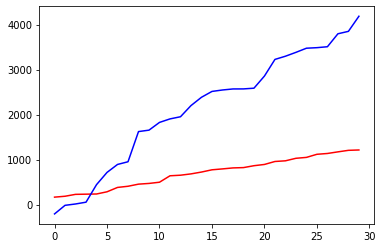

[[  52.  891. 1654. -209.  -18. 3227. 3298. 1622. 3488.  951. 3851. 1904.
  2385.  442. 2571. 2547. 2570. 1826. 1952. 2587.   12. 3384.  714. 3509.
  2200. 2515. 3476. 4187. 3797. 2857.]]
GAN:
[[-234.  554. 1181. -293. 1436. 3117. 2246.  853. 1612.  428. 2138. 2909.
   896. 1910. 1802. 1328. 1547. 1692. 1592. 1750.  915. 2189. 1526. 1424.
  2151. 1893. 2973. 3827. 2608. 2414.]]
1999 1.0 1.0
30
30


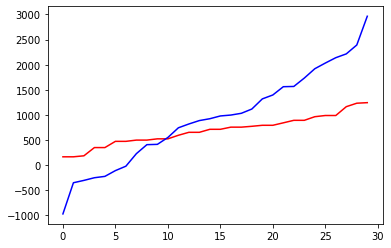

[[ 406. -306.  923.  412. -111.  -23.  978. -974.  818. -353.  227.  886.
  1733. -253.  549. 1318.  996. -226.  742. 2139. 2215. 2032. 2392. 2965.
  1031. 1396. 1561. 1566. 1116. 1919.]]
GAN:
[[ 6.610e+02  1.800e+01  8.980e+02  2.940e+02  7.000e+00  2.710e+02
   9.790e+02 -5.560e+02  8.930e+02  5.800e+02  1.000e+00  4.290e+02
   1.172e+03 -4.700e+01  1.204e+03  1.034e+03  9.850e+02  2.690e+02
   7.270e+02  2.028e+03  1.597e+03  2.001e+03  2.297e+03  2.557e+03
   1.455e+03  8.510e+02  1.624e+03  1.475e+03  9.040e+02  1.853e+03]]
2999 1.0 1.0
30
30


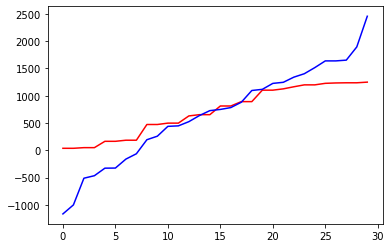

[[ -162.  1637.  -466.  1637.  1339. -1166. -1001.   726.   447.  -326.
   -328.   438.   258.   635.  1225.  1402.   782.  1651.  1245.   -64.
   1514.  1893.   524.  2455.   880.  -512.   748.   193.  1095.  1116.]]
GAN:
[[ -125.  1698.  -283.  1077.  1192. -1193. -1193.   396.   683.  -343.
   -143.   411.  -100.  1207.  1582.  1483.   469.  1842.  1229.  -412.
   1135.  1606.  -235.  2141.   578.  -917.   264.   252.   774.  1240.]]
3999 1.0 0.0
30
30


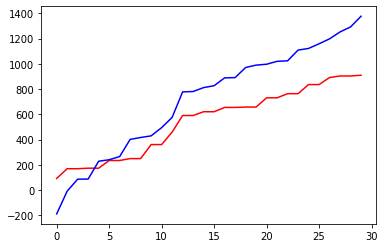

[[ 229. -188.   87.  430.   88.  495.   -8.  241.  402.  266.  889.  576.
   891.  417.  778. 1159.  990. 1122. 1024.  827.  781.  997.  812. 1377.
  1292. 1109.  971. 1020. 1198. 1253.]]
GAN:
[[ 360.  -97.  227.  293.  308.  612.  422.  304.  734.  540.  917.  489.
   915.  868.  983. 1293.  973. 1057. 1269. 1048.  965. 1205.  910. 1332.
   842. 1708. 1186. 1321. 1633. 1552.]]
4999 1.0 1.0
30
30


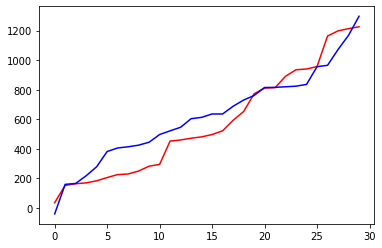

[[ -40.  160.  279.  166.  522.  425.  382.  218.  414.  604.  546.  406.
   824.  497.  636.  445.  816.  965. 1072. 1168.  688.  730.  613.  820.
  1297.  815.  836.  761.  956.  636.]]
GAN:
[[ 295.  -29.  175.   48. -137.  929.  944.  841.  560.  985. 1107.  840.
   916. 1068. 1013. 1173.  984.  640.  992. 1465. 1211. 1199. 1122.  794.
   821. 1567. 1417. 1328. 1619. 1596.]]
5999 0.0 1.0
30
30


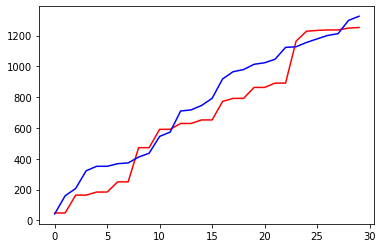

[[ 160.   42.  351.  368.  207.  411.  351.  373.  322.  573.  545.  792.
  1046.  436.  918.  710. 1325. 1023.  979. 1212.  717.  746. 1200. 1298.
  1013. 1127. 1123.  965. 1178. 1155.]]
GAN:
[[  -3.   59.   56.  480.  876.   32.  514.  605.  548.  726.  333.  180.
   857.  496.  630.  644. 1001. 1184. 1278. 1072.  865. 1246. 1098.  743.
  1024. 1498.  919. 1219.  964. 1191.]]
6999 0.0 1.0
30
30


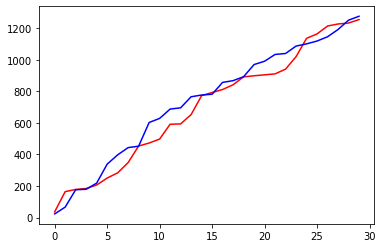

[[ 338.  176.  397.   23.   66.  218.  443.  179.  602.  628.  687.  452.
   695.  781.  867. 1033.  856.  776. 1086. 1191. 1039.  969.  892. 1100.
   765. 1118. 1145.  990. 1275. 1250.]]
GAN:
[[  80.   23.  256.  185.  427.  112.  205.  182.  414.  538.  105.  285.
   669.  410.  553.  508.  770.  734.  815. 1208.  782.  839.  923.  842.
   926. 1117.  844.  835.  799.  841.]]
7999 1.0 1.0
30
30


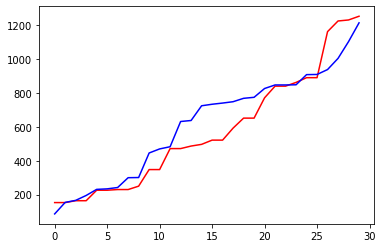

[[  86.  154.  231.  301.  234.  483.  195.  242.  300.  166.  470.  775.
   446.  734.  632.  848.  638.  848.  725.  749.  909.  939. 1005.  741.
   769. 1104.  849.  827.  910. 1215.]]
GAN:
[[  93.  334.  141.  153. -101. -250.  429.  809.  831.  758.  927.  340.
  1117.  283.  800. 1006.  991.  829.  995. 1048.  965. 1190.  302. 1185.
   709.  961. 1048.  873. 1325. 1403.]]
8999 1.0 1.0
30
30


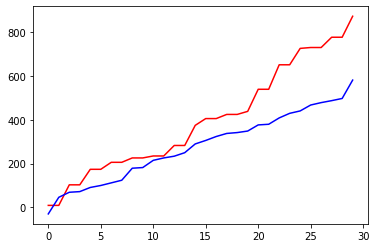

[[-30. 124.  69.  46. 215.  91. 112.  72. 182. 290. 100. 234. 226. 582.
  324. 179. 306. 441. 468. 377. 380. 338. 409. 479. 498. 250. 349. 430.
  342. 488.]]
GAN:
[[  41.  159.  228.   76.  738.  441.  405.  525.  433.  441.  424.  828.
   426. 1350.  591.  548.  518.  712.  887.  718. 1235.  821.  867.  540.
   942.  996.  928. 1436. 1042. 1311.]]
9999 1.0 1.0
30
30


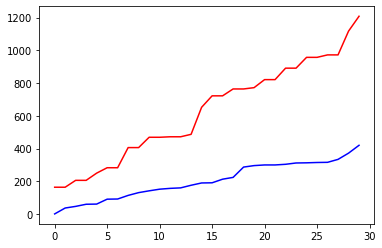

[[  1.  60.  61.  37.  91.  47.  92. 131. 114. 191. 190. 152. 312. 176.
  142. 160. 287. 300. 316. 296. 224. 213. 157. 372. 304. 315. 334. 300.
  420. 313.]]
GAN:
[[ 90.  37. 100.  -9. 174. 125. 269. 322. 339. 375. 308. 399. 289. 546.
  306. 461. 450. 416. 510. 418. 742. 548. 389. 248. 390. 579. 582. 722.
  618. 723.]]


In [13]:
latent_dim =30
# create the discriminator

#try changing activations n such on models
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
created_deck = train(generator, discriminator, gan_model, latent_dim)


In [14]:
print(created_deck)
final_decks = []
for deck in created_deck:
    deck = []
    for card in deck:
        if abs(card) <= maximum:
            deck.append(abs(card))
        else:
            break
    if(len(deck) == 30):
        final_decks.append(deck)
            
            
            

[[  1.  60.  61.  37.  91.  47.  92. 131. 114. 191. 190. 152. 312. 176.
  142. 160. 287. 300. 316. 296. 224. 213. 157. 372. 304. 315. 334. 300.
  420. 313.]]


In [16]:
#instead of rounding maybe try converting it to int, getting rip of the decimal point
# I added np.round to some functions
#also try turning output to predicting integers
#replace old card system to new one with data.json

d = []
for cards in created_deck[6]:
    if abs(cards) <= maximum and abs(cards) > 0:
        d.append(round(abs(cards)))
f = vector_to_deck(d)
f

IndexError: index 6 is out of bounds for axis 0 with size 1